# STEP 7

The 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

The discretized equation for the above PDE is given below,
$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Writing the discretized equation in terms the unknown, we get:
$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [85]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
nx=31
ny=31
nt=40
dx=2/(nx-1)
dy=2/(ny-1)
sigma=0.25
nu=0.05
dt=sigma*dx*dy/nu
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,2,ny)
u=numpy.ones((ny,nx))
un=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2

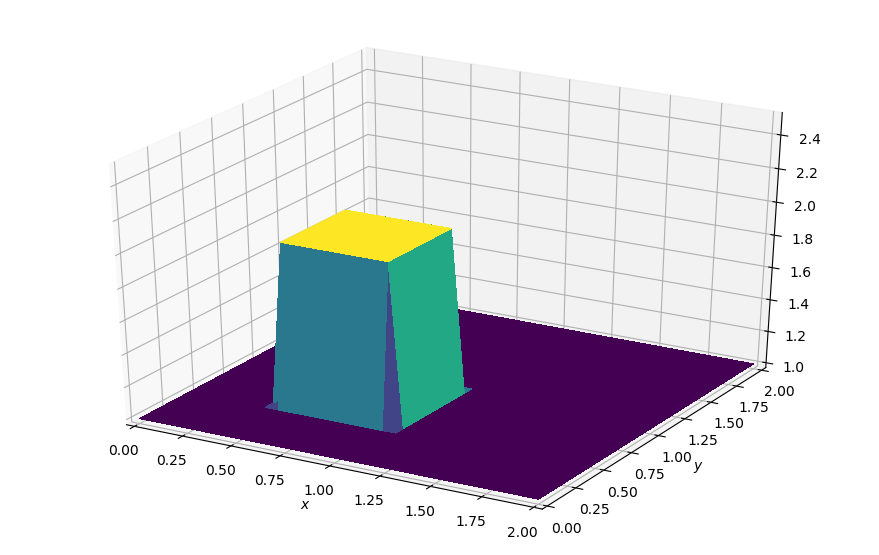

In [86]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [87]:
def diffuse(nt):
    u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2
    for t in range(nt+1):
        un=u.copy()
        for j in range(nx-1):
            for i in range(ny-1):
                u[j,i]=un[j,i]+nu*(dt/dx**2)*(un[j,i+1]-2*un[j,i]+un[j,i-1])+nu*(dt/dy**2)*(un[j+1,i]-2*un[j,i]+un[j-1,i])
                u[0,:]=u[:,0]=u[-1,:]=u[:,-1]
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

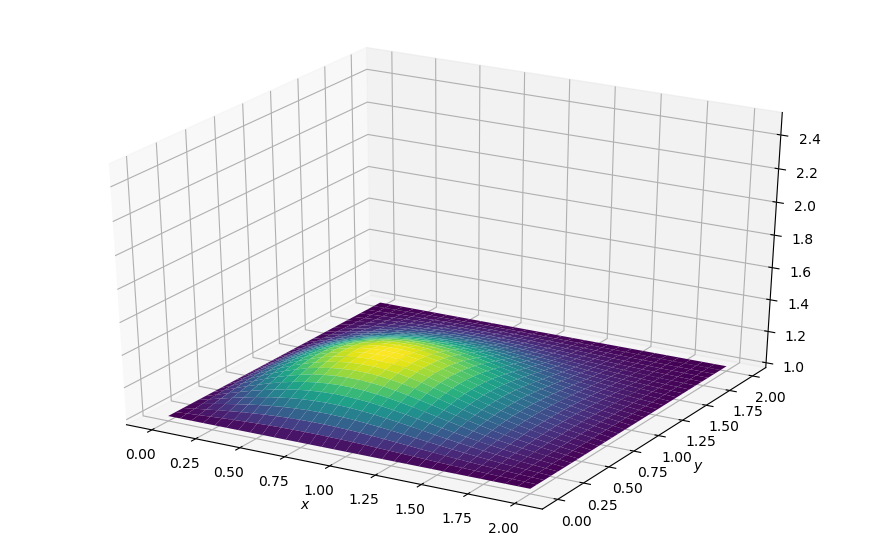

In [89]:
diffuse(100)